In [4]:
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

##Looking to use many ML algorithms such as Logistic Regression, SVM, Decision Trees ! Happy Exploring :!

In [5]:
data=pd.read_csv("C:/Users/sakri18/Desktop/575/sibi/creditcard.csv")
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
##Here we are trying to get an estimate of our target class;
count_classes=pd.value_counts(data['Class'], sort=True)
count_classes ##0 284315 and ##1 492 


0    284315
1       492
Name: Class, dtype: int64

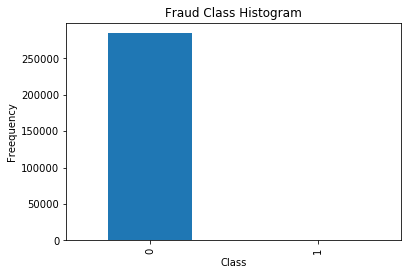

In [14]:
##Count of target Class
count_classes=pd.value_counts(data['Class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Freequency")

In [22]:
from sklearn.preprocessing import StandardScaler
##Normalizing the amount column; The amount column is not in line with the anonimised features;
data['normAmount']=StandardScaler().fit_transform(data['Amount'].reshape(-1,1))
data1=data.drop(['Time','Amount'],axis=1)
data1.head()                                            

C:\Users\sakri18\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [23]:
##Resampling ----> There are several ways to resample Skewed Data; Apart from Over Sampling and Under Sampling, 
#there is a popular approach called "SMOTE" (Synthetic Minority Over-Sampling Technique), which is a combination of Oversampling and Undersampling
#but the oversampling approach is not by replicating minority classes but constructing new minority class data instances via an algorithm;


In [27]:
X=data.iloc[:,data.columns!='Class']
Y=data.iloc[:,data.columns=='Class']

In [31]:
## Number of Data Points in the Minority Class;
number_Records_fraud=len(data[data.Class==1])  ##492
number_Records_fraud ###Fraud instances are the least frequent instances and chances are that some of the fradulent instances 
#would be misclassifyed into the non-fraudulent instances;
number_Records_nonfraud=len(data[data.Class==0])
number_Records_nonfraud ###284315

284315

In [37]:
##fraud Indexes
fraud_indices=np.array(data[data.Class==1].index)
normal_indices=data[data.Class==0].index ##Normal Indexes
##Out of the indices we picked, randomly select "x" number (number_records_fraud)


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)

In [43]:
random_normal_indices=np.random.choice(normal_indices,number_Records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)
##Out of the indices we picked, randomly select "X" number (number_records_fraud)

In [53]:
###Appending the two indices;
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_data=data.iloc[under_sample_indices,:]
under_sample_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,-0.353229
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,1.761758
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,0.606031
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,-0.117342
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,-0.349231


In [58]:
##Spliting on the target class;
X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Class']
Y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Class']
print("Percentage of normal Transactions:",len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data))
print("Percentage of fraud Transactions:", len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data))
print("The number of Transactions in Resampled Data:",len(under_sample_data))

Percentage of normal Transactions: 0.5
Percentage of fraud Transactions: 0.5
The number of Transactions in Resampled Data: 984


In [71]:
### Splitting data into train and test set; Cross Validation to be used when calculating accuracies;
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print("Number of Transactions in the Training Dataset: ", len(X_train))
print("Numner of Transactions in the Testing Dataset: ", len(X_test))
print("Total Number of Transactions: ", len(X_train)+len(X_test))

Number of Transactions in the Training Dataset:  199364
Numner of Transactions in the Testing Dataset:  85443
Total Number of Transactions:  284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,-0.193306
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,-0.345313
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0.030587
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0.878181
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,-0.333239
134016,80609.0,0.039885,2.170693,-2.012595,1.653119,0.615994,-1.770922,0.704471,0.057144,-0.013400,...,-0.154384,0.009633,0.218813,0.248031,-0.507112,-0.420895,0.195478,-0.148335,1.51,-0.347192
204962,135526.0,-0.415555,1.625917,1.622797,4.506173,-0.374560,0.901055,-0.405768,0.713219,-1.475385,...,0.324710,1.126090,-0.110493,-0.068424,-0.658170,0.512898,0.377955,0.204762,2.88,-0.341715
60121,49169.0,1.449410,-0.468795,0.341725,-0.791574,-0.893115,-0.749088,-0.592331,-0.134093,-0.670525,...,-0.137542,-0.531360,0.076941,-0.179287,0.287474,-0.446508,0.006978,0.015877,6.18,-0.328521
167362,118636.0,1.971810,-1.200239,-2.830201,-1.670140,1.732721,3.287608,-1.111164,0.818960,-0.336061,...,0.157371,0.191050,0.114907,0.622991,-0.123644,-0.192286,0.006081,-0.015564,110.85,0.089958
112790,72806.0,-1.367879,-0.238217,1.871754,3.050801,-1.438600,2.489319,1.154520,0.337130,-1.042234,...,0.307356,1.050306,0.238809,-0.240770,-0.467593,0.350808,0.258001,0.083143,465.32,1.507160


In [79]:
##UnderSampled Data;-
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample=train_test_split(X_undersample,Y_undersample,test_size=0.3, random_state=0)
print("")
print("Number of Transactions train data: ", len(X_train_undersample))
print("Number of Transactions test data:", len(X_test_undersample))
print("Total number of Transactions:", len(X_train_undersample)+len(X_test_undersample))
###Now that we prepared our data, we are now ready for the logistic regression;


Number of Transactions train data:  688
Number of Transactions test data: 296
Total number of Transactions: 984


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report


In [106]:
def printing_Kfold_scores(x_train_data,y_train_data):
    print("length",len(x_train_data))
    print("length",len(y_train_data))
    fold = KFold(len(y_train_data),5,shuffle=False) 
    fold
    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [102]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [107]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)


length 688
length 688
-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.808219178082
Iteration  2 : recall score =  0.821917808219
Iteration  3 : recall score =  0.881355932203
Iteration  4 : recall score =  0.878378378378
Iteration  5 : recall score =  0.893939393939

Mean recall score  0.856762138165

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration 

C:\Users\sakri18\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


 1 : recall score =  0.849315068493
Iteration  2 : recall score =  0.86301369863
Iteration  3 : recall score =  0.966101694915
Iteration  4 : recall score =  0.932432432432
Iteration  5 : recall score =  0.893939393939

Mean recall score  0.900960457682

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.849315068493
Iteration  2 : recall score =  0.890410958904
Iteration  3 : recall score =  0.983050847458
Iteration  4 : recall score =  0.945945945946
Iteration  5 : recall score =  0.893939393939

Mean recall score  0.912532442948

-------------------------------------------
C parameter:  10
-------------------------------------------

Iteration  1 : recall score =  0.86301369863
Iteration  2 : recall score =  0.890410958904
Iteration  3 : recall score =  0.983050847458
Iteration  4 : recall score =  0.945945945946
Iteration  5 : recall score =  0.893939393939

Mean recall score  0.915272168975

---

Recall metric in the testing dataset:  0.925170068027


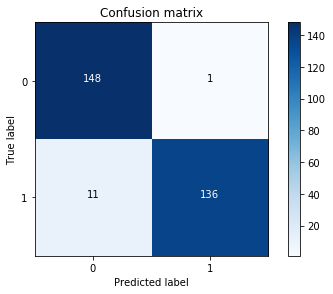

In [103]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.925170068027


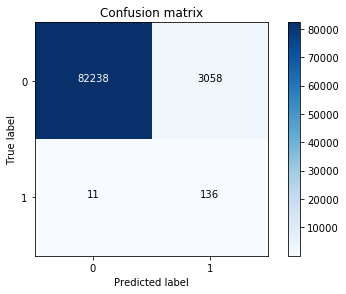

In [104]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

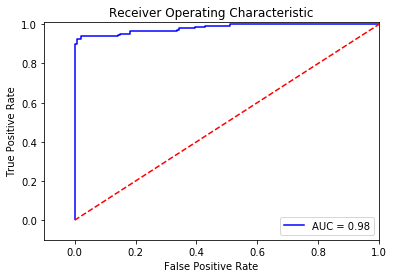

In [105]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()